## IMPORTS

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## LOAD DATA

In [2]:
df= pd.read_csv("house_prices.csv")

## BASIC INFO

In [3]:
df.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [4]:
df.columns

Index(['Property_ID', 'Area', 'Bedrooms', 'Bathrooms', 'Age', 'Location',
       'Property_Type', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Property_Type  300 non-null    object
 7   Price          300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

Property_ID      0
Area             0
Bedrooms         0
Bathrooms        0
Age              0
Location         0
Property_Type    0
Price            0
dtype: int64

In [7]:
df.shape

(300, 8)

## EDA (5+ Visualizations)

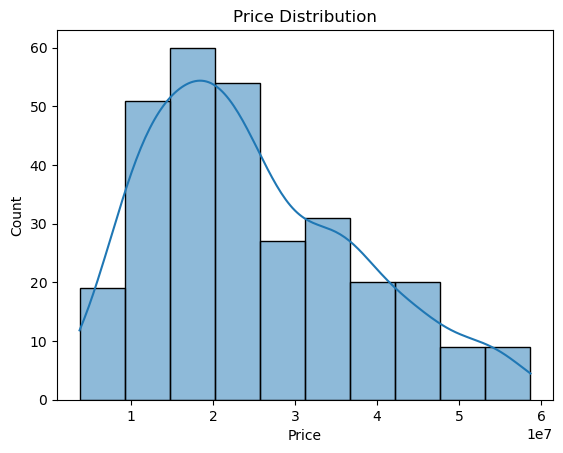

In [10]:
#1. Price Distribution
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

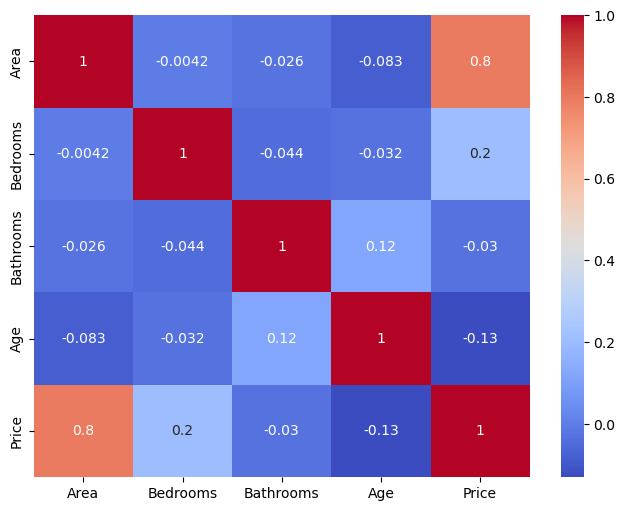

In [11]:
#Correlation Heatmap (Numerical Only)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

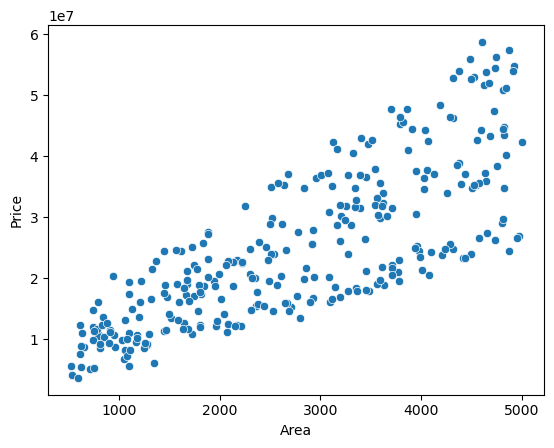

In [12]:
#Area vs Price
sns.scatterplot(x="Area", y="Price", data=df)
plt.show()

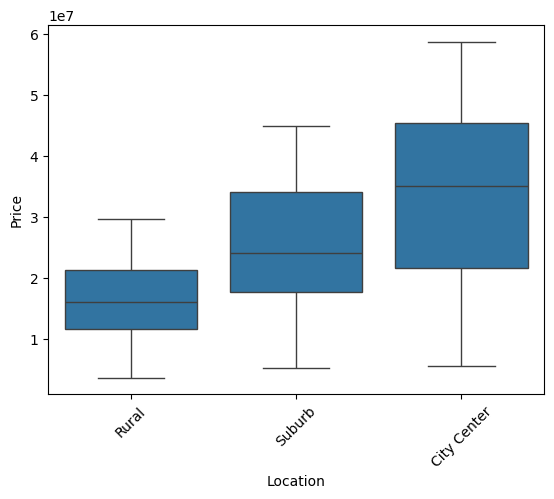

In [13]:
#Location vs Price
sns.boxplot(x="Location", y="Price", data=df)
plt.xticks(rotation=45)
plt.show()

## MODEL EVALUATION (MULTIPLE)

In [17]:
X = df[["Area", "Bedrooms", "Bathrooms", "Age"]]
y = df["Price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

In [19]:
#Random Forest
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

In [20]:
#Gradient Boosting
model3 = GradientBoostingRegressor()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)

## COMPARE PERFORMANCE

In [21]:
from sklearn.metrics import r2_score

print("Linear R2:", r2_score(y_test, pred1))
print("Random Forest R2:", r2_score(y_test, pred2))
print("Gradient Boosting R2:", r2_score(y_test, pred3))

Linear R2: 0.6190227024972179
Random Forest R2: 0.5851102216734482
Gradient Boosting R2: 0.5554930121583448


## Visualization – Predictions vs Actual

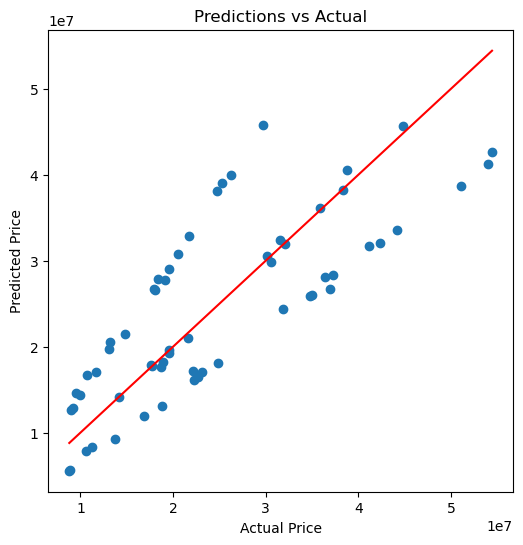

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predictions vs Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.show()